# Symulator pożaru lasu
#### Michał Ociepka

In [10]:
from IPython.display import Image
from simulations import *
%matplotlib inline

### 1) Opis problemu
    Rocznie na świecie człowiek rejestruje około 2000 pożarów lasów. Są one często niebezpieczne nie tylko dla fauny i flory, ale także dla ludzi. Z drugiej strony w ekosystemach takich jak tajga, lasy twardolistne pożary lasów są korzystne dla rozwoju roślinności a dla sekwoi są one wręcz niezbędne do tworzenia się nowych osobników.

    Ze względu na częste występowanie naturalnych pożarów oraz ze względu na stosowanie polityki "let it burn", w niektórych regionach świata, konieczne jest stworzenie symulatorów, które przewidywałyby rozchodzenie się ognia w zależności od czynników zewnętrznych.

### 2) Opis symulatora
#### Symulutor posiada następujące parametry:
    * size (int) - wielkość lasu (siatka kwadratów o boku size)
    * square_size (int) - długość boku jednej powierzchni w lesie w metrach
    * forest_density (float: (0, 1)) - gęstość lasu (prawdopodobieństwo wystąpienia roślinności w poszczególnych kwaratach)
    * humidity (float[a, b]: a, b ∈ (0, 1), a<b ) - wilgotność względna powietrza 
    * wind_power (int) - siła wiatru w kmh
    * wind_direction (char: ('N', 'E', 'W', 'S')) - kierunek wiania wiatru
    * start_fire_power (int) - typ zapłonu lasu
        @ 0 - małe ognisko
        @ 1 - duże ognisko/piorun/trakcja energetyczna
        @ 2 - ogień spowodowany przez dużą ingerencję człowieka
    * steps (int) - liczba kroków animacji każda odpowiada 10min
    
    Uwaga! Symulator zakłada, że użytkownik jest inteligentny 
    
#### Przykładowy zrzut ekranu z symulatora:

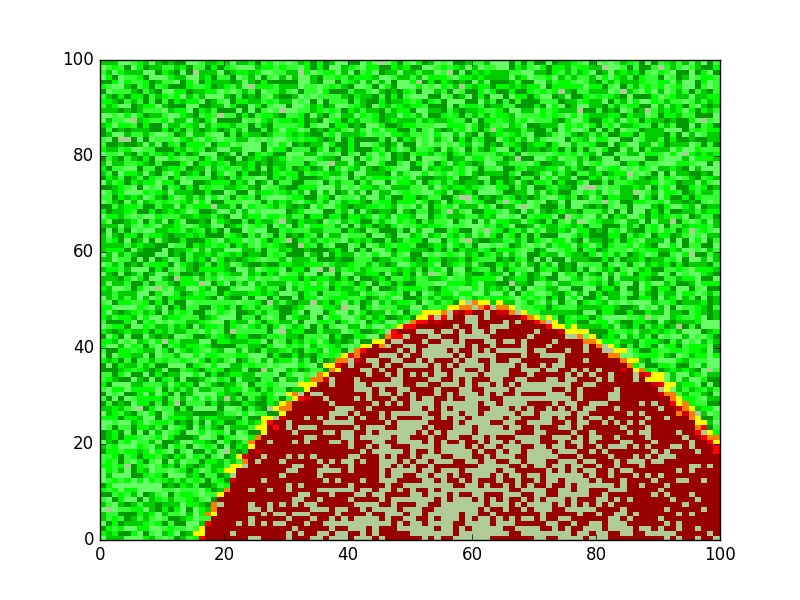

In [39]:
Image("images/figure_2.png", width=300, height=300)

    Przedstawiony las o size=100 składa się kwadracików o rozmiarze 1 hektara. 
    * Obszary zielone są porośnięte drzewami. Im intensywniejszy kolor tym wyższa zasobność drzewostanu(średnio 240m^3/ha) 
    * Obszary szare oznaczają tereny pozbawione roślinności
    * Intensywność koloru czerwonego oznacza siłę ognia w danym miejscu

#### Wiatr
    Rozchodzenie się ognia:

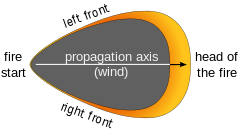

In [15]:
Image("images/wind.png", width=300, height=300)

    Prędkość rozchodzenia się ognia w zależności od siły wiatru:

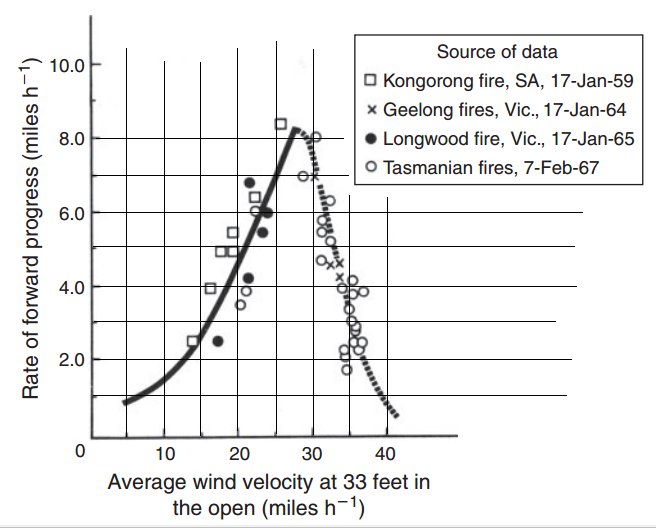

In [16]:
Image("images/fire_speed.png", width=300, height=300)

    Na podstawie wykresu za pomocą regresji został wyliczony przybliżony wzór rozchodzenia się ognia w zależności od wiatru:
    
    y = -1.27206625*10^(-3)*x^3 + 6.74299842*10^(-2)*x^2 - 7.45760798*10^(-1)*x + 3.1844528 przy założeniu, że y(x<10)=y(10)
    
    Aby dobrze dobrać parametry siły waitru polecam stronę: 
    http://zasoby1.open.agh.edu.pl/dydaktyka/inzynieria_srodowiska/c_odnaw_zrodla_en/files/skala_beauforta.htm
    
    W przypadku, dużej siły wiatru (powyżej 110kmh) zgodnie z tabelą z podanej wyżej strony, drzewa mogą być wyrywane.

### Wilgotność
    Wilgotność zmniejsza szansę na zapłon drzewa oraz utrudnia jego późniejsze spalanie. Wilgotność drewna zmienia się mniej-więcej liniowo w zależności od wilgotności względnej powietrza. W modelu użyłem z tego powodu liniowej zmienności szansy zapalenia nowego obszaru.

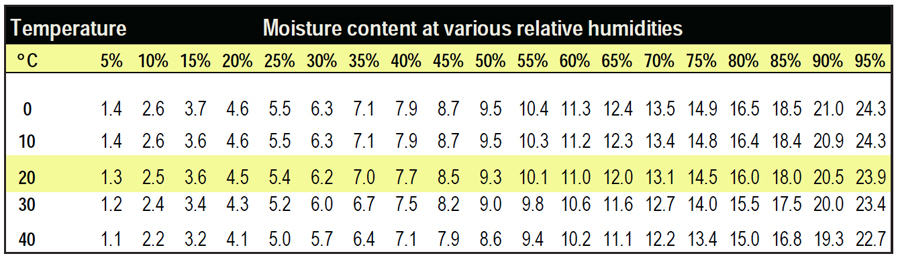

In [19]:
Image("images/wilgotnosc.jpg", width=500, height=500)

### 3) Eksperymenty

##### a) Przeciętny las
    powierzchnia 10km^2 (pojedyńcze obszary 1ha)
    wilgotność 63% (średnia za rok 2015 w Polsce)
    wiatr 23kmh, 'E' (średnia z ostatnich 18 lat w Polsce)
    gęstość 33% (powierzchnia zajmowana w Polsce przez lasy)
    punkt zakłonowy 1 - przewrócił się słup trakcji elektrycznej (nie wymieniany od czasów Mieszka II)
    czas obserwacji pożaru 6h

Początki pożaru:


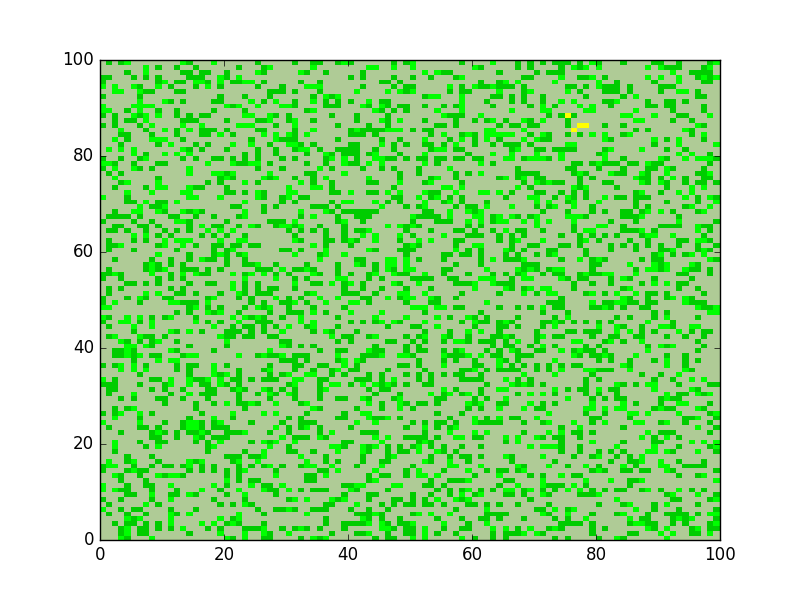

In [28]:
print "Początki pożaru:"
Image("images/1_start.png", width=500, height=500)

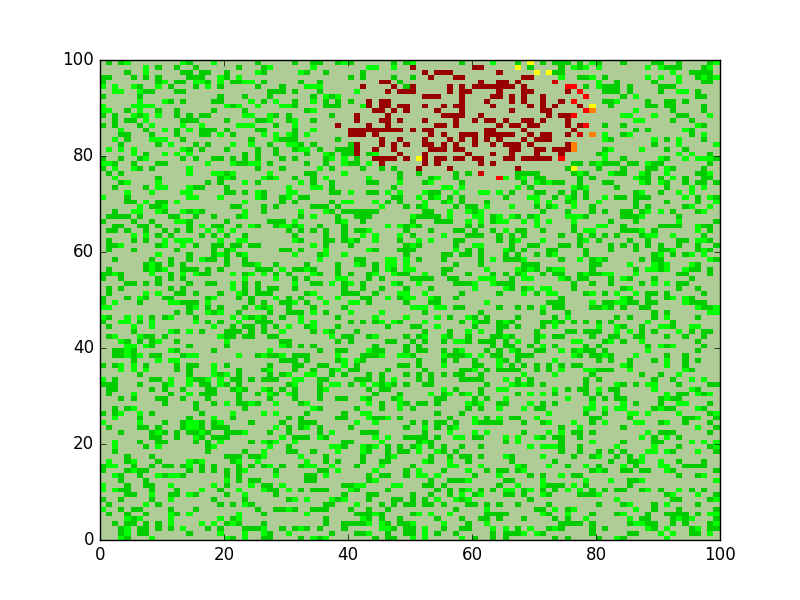

In [22]:
Image("images/1_1h.png", width=500, height=500)

Po 6h:


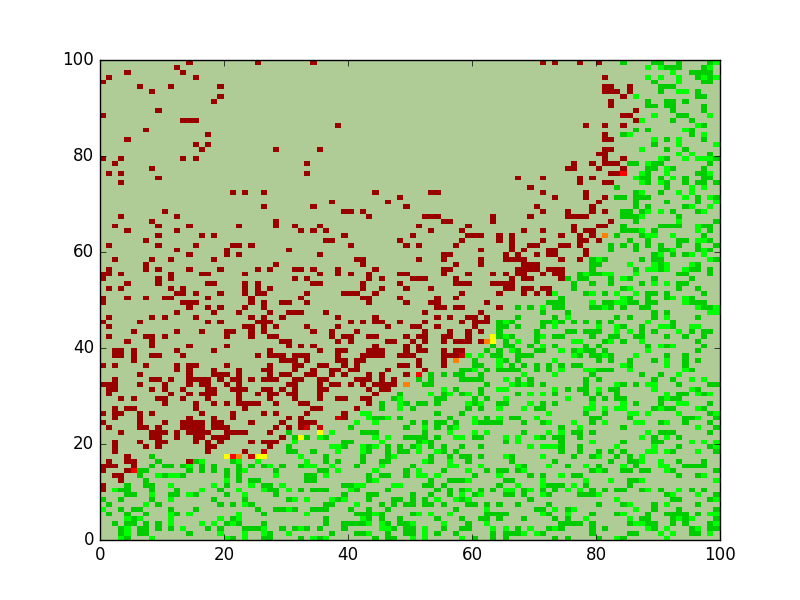

In [30]:
print "Po 6h:"
Image("images/1_6h.png", width=500, height=500)

Zmiana zasobności terenu w zależności od czasu:


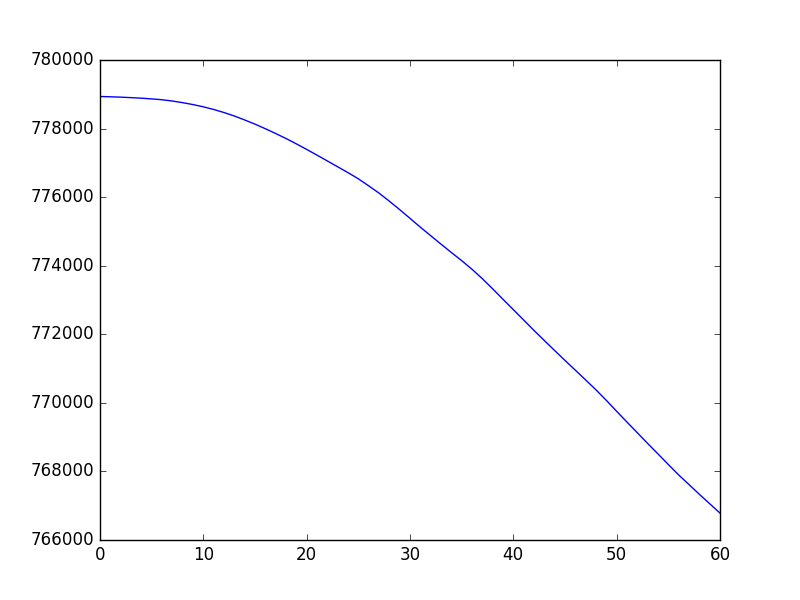

In [31]:
print "Zmiana zasobności terenu w zależności od czasu:"
Image("images/1_palenie.png", width=500, height=500)

    Wniosek: Gdyby "uśrednić" Polskę - rozmieścić wszystkie drzewa w Polsce równomiernie na jej powierzchni i ustawić przeciętne warunki atmosferyczne to bez ingerencji człowieka Polska by spłoneła w...
        Powierzchnia Polski: 3126790ha
        Ha lasu:1031840.7ha
        Zasobność: 268278582m^3
    ... niecały rok.

##### b) Niedopałek papierosa w suchym gęstej puszczy - bo niekt nie stawia koszy w głuszy
    powierzchnia 10km^2 (pojedyńcze obszary 1ha)
    wilgotność [0%, 5%]
    wiatr 5kmh, 'N'
    gęstość 99%
    punkt zakłonowy 0.5 - jak w temacie
    czas obserwacji pożaru 6h

Początki pożaru:


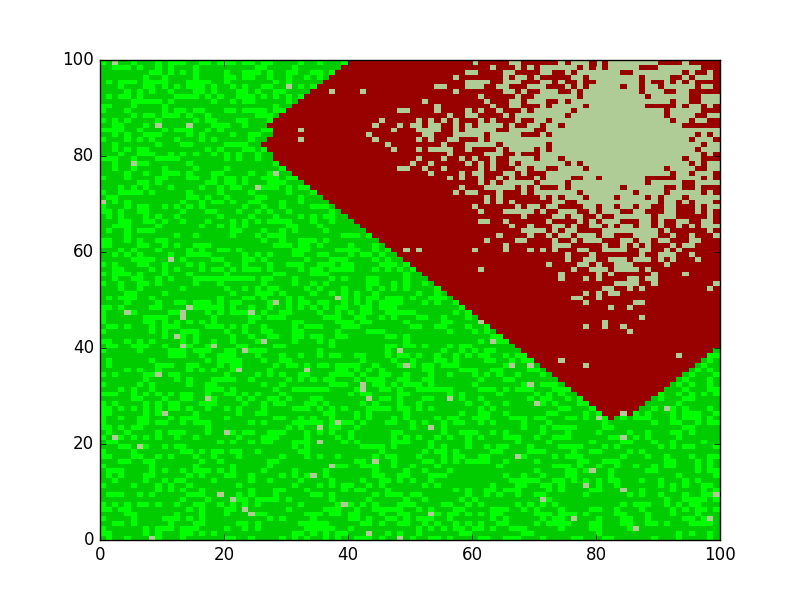

In [33]:
print "Początki pożaru:"
Image("images/2_end.png", width=500, height=500)

wykres spalania:


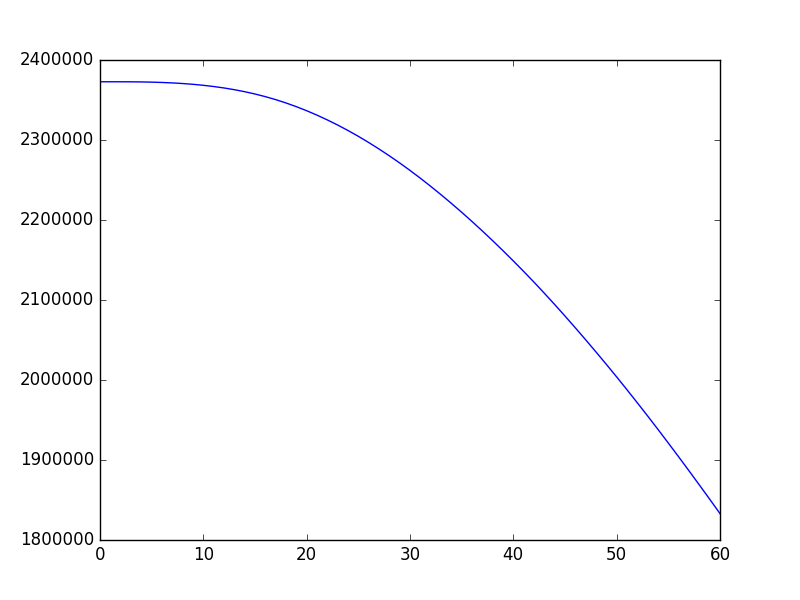

In [35]:
print "wykres spalania:"
Image("images/2_palenia.png", width=500, height=500)

    Wniosek: las był idealnie suchy i miał dużo więcej materiału palnego niż w pierwszym eksperymencie. Pomimo tego ogień strawił dużo mniejszą powierzchnię. Co za tym idzie wiatr ma kluczową rolę w rozpsestrzenianiu się ognia i bez niego nie rozprzestrzeni się na dużej powierzchni.

##### c) Niech wieje
    Skoro wiatr ma kluczową rolę w roznoszeniu się ognia to zobaczmy co się stanie podczas huraganu(12 w skali Beauforta).
    powierzchnia 10km^2 (pojedyńcze obszary 1ha)
    wilgotność [0%, 1%] (wywiało wodę)
    wiatr 500kmh, 'N' (najsilniejszy zarejestrowany wiatr na Ziemi (Oklahoma, 1999r.))
    gęstość 80%
    punkt zakłonowy 5 - wybuch cysterny z paliwem (nie wiem co ona robiła w lesie)
    czas obserwacji pożaru 6h

start:


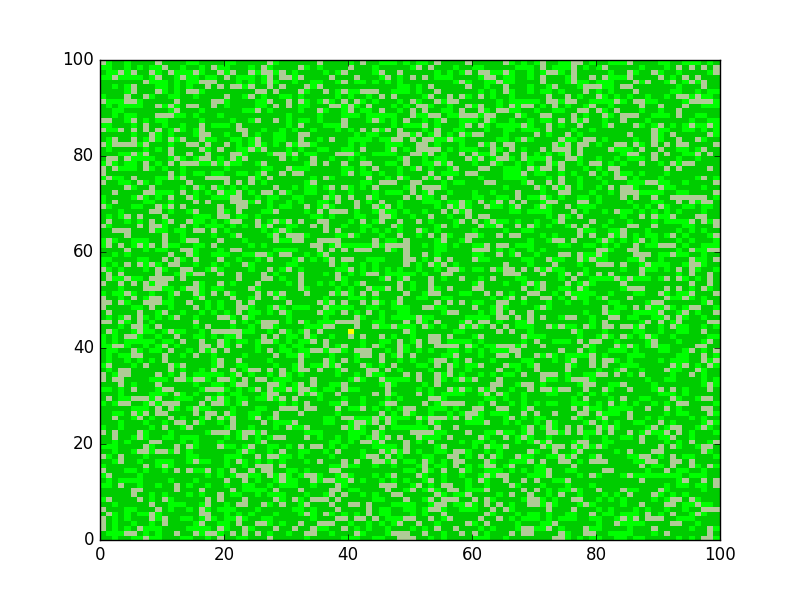

In [36]:
print "start:"
Image("images/3_start.png", width=500, height=500)

po 3h:


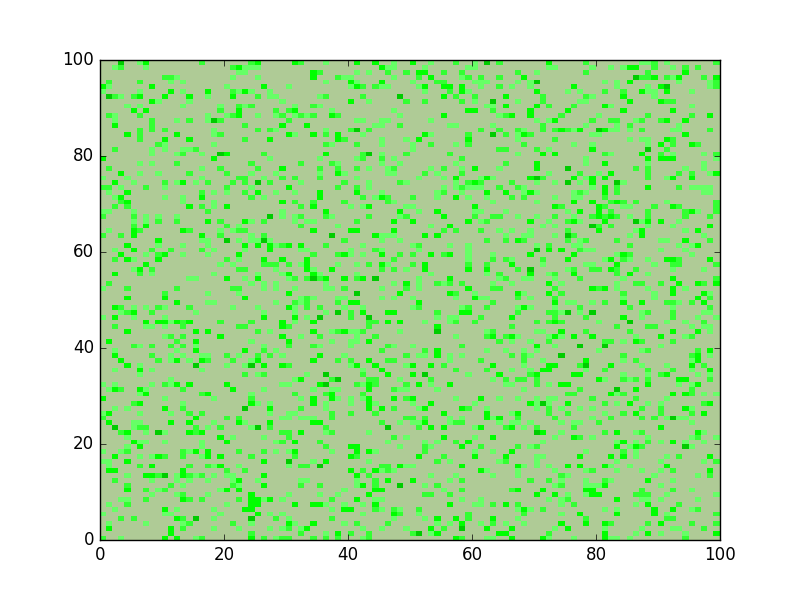

In [37]:
print "po 3h:"
Image("images/3_3h.png", width=500, height=500)

zasobność:


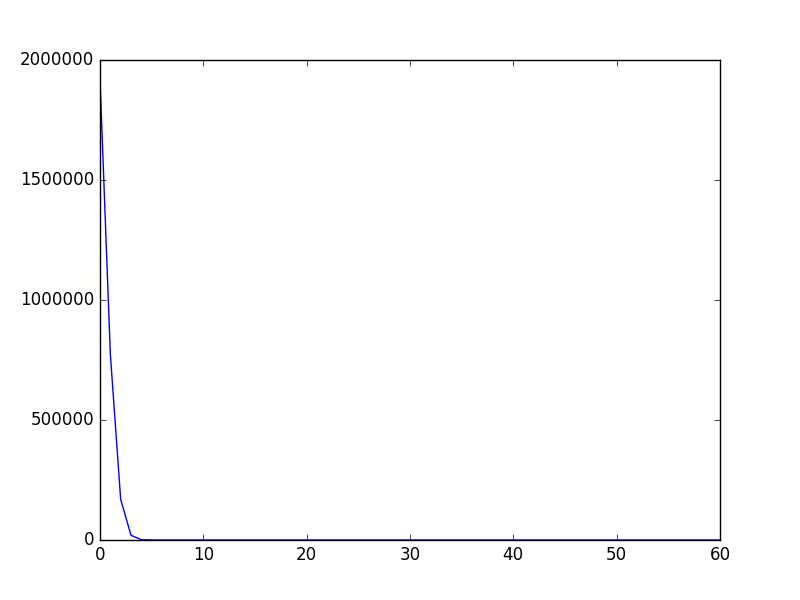

In [38]:
print "zasobność:"
Image("images/3_zasobnosc.png", width=500, height=500)

    Wniosek: duży wiatr utrudnia rozprzestrzenianie się wiatru

Bibliografia:
    * http://nifty.stanford.edu/2007/shiflet-fire/
    * http://www.fs.fed.us/rm/pubs_other/rmrs_2013_andrews_p001.pdf
    * https://bib.irb.hr/datoteka/278897.Ljiljana_Bodrozic_ceepus2006_2.pdf
    * https://books.google.pl/books?id=AkD9yVYbkxwC&pg=PA27&lpg=PA27&dq=forest+fire+humidity+simulations&source=bl&ots=nyivo9yHMT&sig=55iaIOEqjf7ArRVBGK0Zn45HYQY&hl=pl&sa=X&ved=0ahUKEwj0jYDE1fzLAhUkDZoKHWeCAikQ6AEIOjAD#v=onepage&q=forest%20fire%20humidity%20simulations&f=false
    * www.wikipedia.com
    * materiały udostępniane przez Lasy Państwowe
    * źródła własne